In [64]:
import pandas as pd

bids = pd.read_csv('Data/bids.csv')
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [65]:
print(bids.shape)
print(bids.keys())
result = pd.merge(bids, train, on='bidder_id', how='inner')  # Use 'inner' to avoid nans values, because 'inner' return only samples that are in both of dataframes.
print(result.keys())
result.shape

(7656334, 9)
Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url'],
      dtype='object')
Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address', 'outcome'],
      dtype='object')


(3071224, 12)

bid_id - unique id for this bid <br/>
bidder_id – Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv) <br/>
auction – Unique identifier of an auction (asta) <br/>
merchandise –  The category of the auction site campaign, which means the bidder might come to this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods". This categorical field could be a search term, or online advertisement.  **DROP** <br/>
device – Phone model of a visitor **DROP** <br/>
time - Time that the bid is made (transformed to protect privacy). **categozation** <br/>
country - The country that the IP belongs to <br/>
ip – IP address of a bidder (obfuscated to protect privacy). **DROP** <br/>
url - url where the bidder was referred from (obfuscated to protect privacy). <br/>
payment_account – Payment account associated with a bidder. These are obfuscated to protect privacy. <br/>
address – Mailing address of a bidder. These are obfuscated to protect privacy. <br/>
outcome – Label of a bidder indicating whether or not it is a robot. Value 1.0 indicates a robot, where value 0.0 indicates human. <br/>


In [66]:
result.head(5)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,payment_account,address,outcome
0,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
1,25,668d393e858e8126275433046bbd35c6tywop,38v0a,furniture,phone4,9759243315789473,bd,147.64.206.30,vasstdc27m7nks3,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
2,39,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone35,9759243368421052,in,75.11.239.20,i92xwb95qdo901j,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
3,42,668d393e858e8126275433046bbd35c6tywop,jkyzt,furniture,phone38,9759243368421052,in,215.203.78.242,s4hrzaqd5vbq2he,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0
4,68,668d393e858e8126275433046bbd35c6tywop,h2xrf,furniture,phone57,9759243526315789,in,134.198.237.242,1euklxshlldto4z,a3d2de7675556553a5f08e4c88d2c228ucoac,42a3b61a1fe69d66ad60f3e347aa09b1erfe2,0.0


## How to

1. bidder_god: boolean (0/1) --> 
2. immediate_bid: boolean (0/1) per bid / count per bidder --> 
3. number_of_payment_methods: int --> 
4. bidder_activity: int --> 
5. number_of_device: int --> 
6. number_of_country ?  


In [67]:
print("DESCRIPTION OF FEATURES: " + str(result.keys()))
print("SHAPE: " + str(result.shape))
print("TOTAL NULL: \n" + str(result.isnull().sum()))

# import seaborn as sns
# sns.heatmap(result.isnull(), cbar=False, cmap='viridis')

# result.hist(bins=20, figsize=(10, 8))

DESCRIPTION OF FEATURES: Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address', 'outcome'],
      dtype='object')
SHAPE: (3071224, 12)
TOTAL NULL: 
bid_id                0
bidder_id             0
auction               0
merchandise           0
device                0
time                  0
country            2701
ip                    0
url                   0
payment_account       0
address               0
outcome               0
dtype: int64


## IP RESPONSE

In [68]:
import requests

# for i in range(len())
ip = "32.44.186.109"  # Esempio di IP
response = requests.get(f'http://ip-api.com/json/{ip}')
data = response.json()
print(f"Nazione: {data['country']}")

Nazione: United States


## FIRST TRY

In [69]:
print(result.keys())
result.head(5)
print(result["ip"].nunique()) # 1.030.950
print(result["time"].nunique()) # 742.669 
print(result["url"].nunique()) # 663.873
print(result["auction"].nunique()) # 12.740
print(result["device"].nunique()) # 5.729
print(result["payment_account"].nunique()) # 1.984
print(result["address"].nunique()) # 1.984
print(result["country"].nunique()) # 198
print(result["merchandise"].nunique()) # 10

# Drop bid_id, time, url, ip
result.drop(["bid_id", "ip", "url", "time"], axis=1, inplace=True)

Index(['bid_id', 'bidder_id', 'auction', 'merchandise', 'device', 'time',
       'country', 'ip', 'url', 'payment_account', 'address', 'outcome'],
      dtype='object')
1030950
742669
663873
12740
5729
1984
1984
198
10


In [70]:
# Encoding features

# Fix none in country
mode_country = result["country"].mode()
print(mode_country.iloc[0])
for country in result["country"]:
	if country == None:
		country = mode_country.iloc[0]
		
print(result.isna().sum())

# Label Encoding for merchandise, country, 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
result["merchandise"] = encoder.fit_transform(result['merchandise'])
result["country"] = encoder.fit_transform(result['country'])
result["payment_account"] = encoder.fit_transform(result['payment_account'])
result["address"] = encoder.fit_transform(result['address'])
result["device"] = encoder.fit_transform(result['device'])
result["auction"] = encoder.fit_transform(result['auction'])
result["bidder_id"] = encoder.fit_transform(result['bidder_id'])
result['outcome'] = result['outcome'].astype(int)

# Drop columns that have been encoded 
# result.drop(["merchandise", "country", "payment_account", "address", "device", "auction"], axis=1, inplace=True)
result.head(5)

in
bidder_id             0
auction               0
merchandise           0
device                0
country            2701
payment_account       0
address               0
outcome               0
dtype: int64


,bidder_id,auction,merchandise,device,country,payment_account,address,outcome
0,797,3645,4,1,84,1497,438,0
1,797,1092,4,3090,15,1497,438,0
2,797,3645,4,2627,84,1497,438,0
3,797,6953,4,2908,84,1497,438,0
4,797,6099,4,4459,84,1497,438,0


In [71]:
X = result.iloc[:, result.columns != "outcome"]
y = result.iloc[:, result.columns == "outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

y_test.head(5)

outcome
0          1329404
1           206208
Name: count, dtype: int64
outcome
0          1329404
1           206208
Name: count, dtype: int64


,outcome
2285591,0
1465645,0
929992,0
502333,0
811059,0


0.9999791614027502
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1329404
           1       1.00      1.00      1.00    206208

    accuracy                           1.00   1535612
   macro avg       1.00      1.00      1.00   1535612
weighted avg       1.00      1.00      1.00   1535612



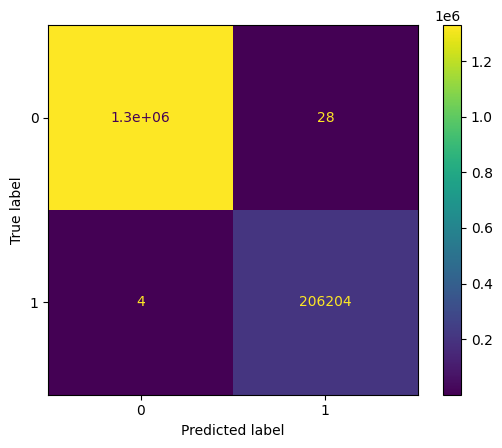

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# y_pred = y_pred.astype(int)

print(accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# plt.figure(figsize=(10, 7))
# plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
# plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
cm_dt = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


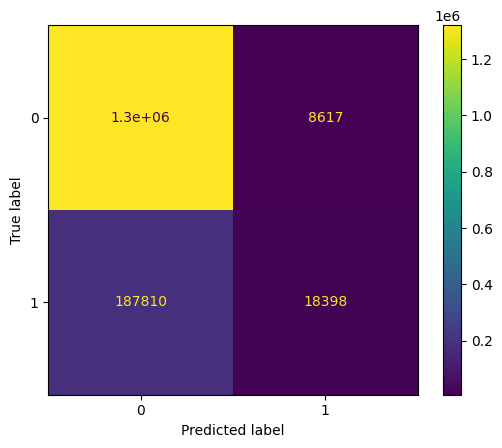

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression() # The model is initialized to use 25 neighbors in the classification phase
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Confusion Matrix
cm_lr = ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)

# Classification Report (includes precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)

In [74]:
result.drop(["bidder_id", "auction", "device", "address", "payment_account"], axis=1, inplace=True)
result.head(5)

,merchandise,country,outcome
0,4,84,0
1,4,15,0
2,4,84,0
3,4,84,0
4,4,84,0


0.9051860414004184
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95    531762
           1       0.78      0.41      0.54     82483

    accuracy                           0.91    614245
   macro avg       0.85      0.70      0.74    614245
weighted avg       0.90      0.91      0.89    614245



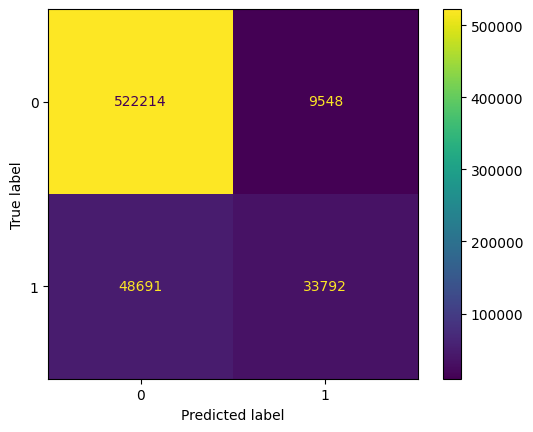

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X = result.iloc[:, result.columns != "outcome"]
y = result.iloc[:, result.columns == "outcome"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
# y_pred = y_pred.astype(int)

print(accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# plt.figure(figsize=(10, 7))
# plot_tree(dt, feature_names=X.columns, class_names=['0', '1'], filled=True)
# plt.show()

from sklearn.metrics import ConfusionMatrixDisplay
cm_dt = ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)

## Rimuovere tutte le feature legate al bidder_id, perchè impara troppo bene